In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.metrics import accuracy_score

In [4]:
import warnings
warnings.filterwarnings('ignore') # disabling warnings for presentation/ bad practice don't do it.

## Loading the dataset

In [5]:
df = pd.read_csv('data.csv')

In [6]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [8]:
df.drop(columns = ['Unnamed: 32', 'id'], inplace=True)

In [9]:
def replace_label(x):
    if x is 'M':
        return 1
    else:
        return 0
    
df['diagnosis'] = df['diagnosis'].apply(replace_label)

In [10]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
df[df['concavity_mean'] == 0]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
101,0,6.981,13.43,43.79,143.5,0.11700,0.07568,0.0,0.0,0.1930,...,7.930,19.54,50.41,185.2,0.15840,0.12020,0.0,0.0,0.2932,0.09382
140,0,9.738,11.97,61.24,288.5,0.09250,0.04102,0.0,0.0,0.1903,...,10.620,14.10,66.53,342.9,0.12340,0.07204,0.0,0.0,0.3105,0.08151
174,0,10.660,15.15,67.49,349.6,0.08792,0.04302,0.0,0.0,0.1928,...,11.540,19.20,73.20,408.3,0.10760,0.06791,0.0,0.0,0.2710,0.06164
175,0,8.671,14.45,54.42,227.2,0.09138,0.04276,0.0,0.0,0.1722,...,9.262,17.04,58.36,259.2,0.11620,0.07057,0.0,0.0,0.2592,0.07848
192,0,9.720,18.22,60.73,288.1,0.06950,0.02344,0.0,0.0,0.1653,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.0,0.0,0.1909,0.06559
314,0,8.597,18.60,54.09,221.2,0.10740,0.05847,0.0,0.0,0.2163,...,8.952,22.44,56.65,240.1,0.13470,0.07767,0.0,0.0,0.3142,0.08116
391,0,8.734,16.84,55.27,234.3,0.10390,0.07428,0.0,0.0,0.1985,...,10.170,22.80,64.01,317.0,0.14600,0.13100,0.0,0.0,0.2445,0.08865
473,0,12.270,29.97,77.42,465.4,0.07699,0.03398,0.0,0.0,0.1701,...,13.450,38.05,85.08,558.9,0.09422,0.05213,0.0,0.0,0.2409,0.06743
538,0,7.729,25.49,47.98,178.8,0.08098,0.04878,0.0,0.0,0.1870,...,9.077,30.92,57.17,248.0,0.12560,0.08340,0.0,0.0,0.3058,0.09938
550,0,10.860,21.48,68.51,360.5,0.07431,0.04227,0.0,0.0,0.1661,...,11.660,24.77,74.08,412.3,0.10010,0.07348,0.0,0.0,0.2458,0.06592


In [12]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [13]:
standard_error_columns = [i for i in df.columns if i.endswith('_se')]

In [14]:
df.drop(columns = standard_error_columns, inplace = True) 

In [15]:
df.shape

(569, 21)

In [16]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


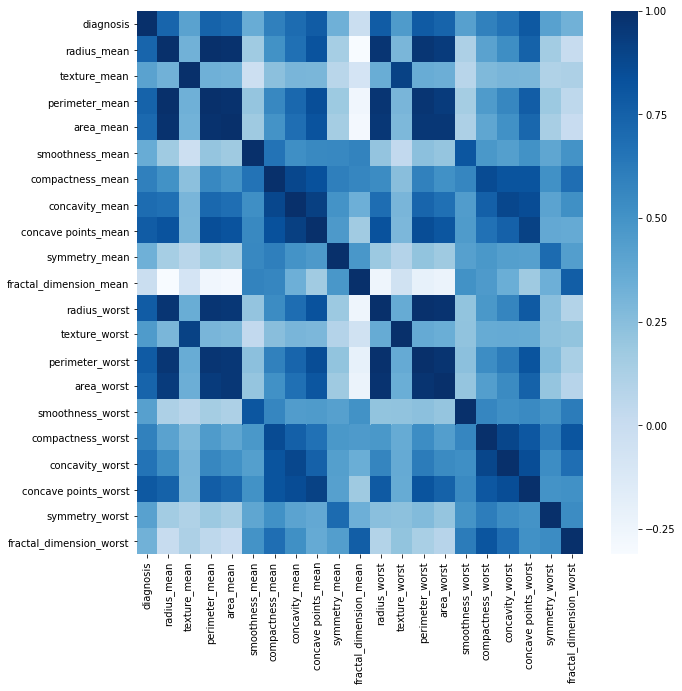

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='Blues',annot=False) 

In [18]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
to_drop

['perimeter_mean',
 'area_mean',
 'concave points_mean',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

In [19]:
df.drop(columns = to_drop, inplace=True)

In [20]:
df.shape

(569, 13)

In [21]:
df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,0.1622,0.6656,0.7119,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.1238,0.1866,0.2416,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.1444,0.4245,0.4504,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.2098,0.8663,0.6869,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.1374,0.2050,0.4000,0.2364,0.07678


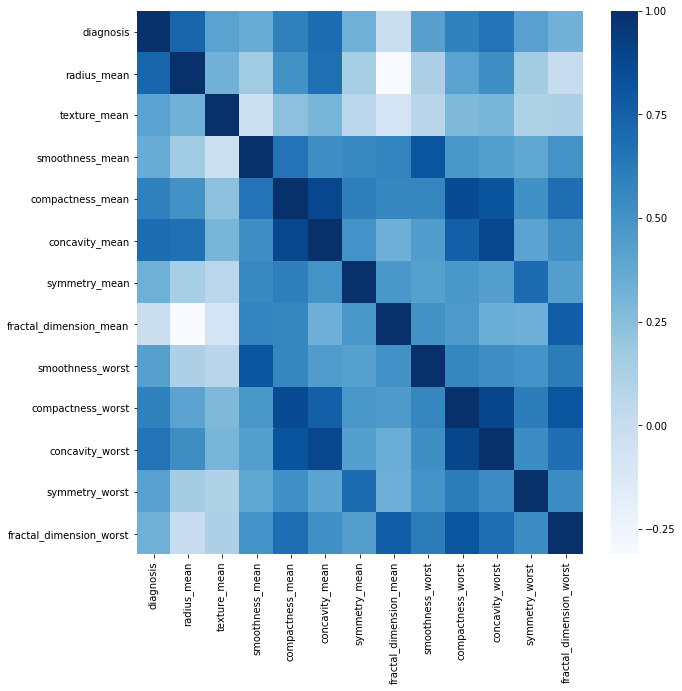

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='Blues',annot=False) 

In [23]:
df.describe()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,0.096360,0.104341,0.088799,0.181162,0.062798,0.132369,0.254265,0.272188,0.290076,0.083946
std,0.483918,3.524049,4.301036,0.014064,0.052813,0.079720,0.027414,0.007060,0.022832,0.157336,0.208624,0.061867,0.018061
min,0.000000,6.981000,9.710000,0.052630,0.019380,0.000000,0.106000,0.049960,0.071170,0.027290,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,0.086370,0.064920,0.029560,0.161900,0.057700,0.116600,0.147200,0.114500,0.250400,0.071460
50%,0.000000,13.370000,18.840000,0.095870,0.092630,0.061540,0.179200,0.061540,0.131300,0.211900,0.226700,0.282200,0.080040
75%,1.000000,15.780000,21.800000,0.105300,0.130400,0.130700,0.195700,0.066120,0.146000,0.339100,0.382900,0.317900,0.092080
max,1.000000,28.110000,39.280000,0.163400,0.345400,0.426800,0.304000,0.097440,0.222600,1.058000,1.252000,0.663800,0.207500


In [24]:
# Need to add some box plot to understand/detect outliers

## Some plots to understand the distribution better

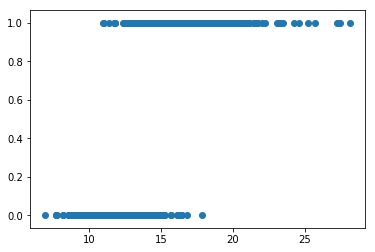

In [25]:
plt.figure()
plt.scatter(df['radius_mean'], df['diagnosis'])
plt.show()

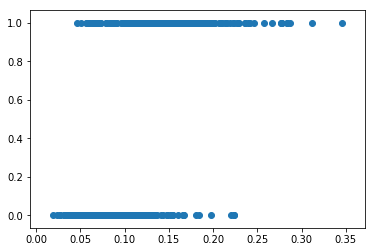

In [26]:
plt.figure()
plt.scatter(df['compactness_mean'], df['diagnosis'])
plt.show()

In [27]:
df_b = df[df['diagnosis'] == 0]

In [28]:
df_m = df[df['diagnosis'] == 1]

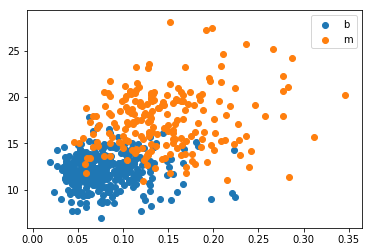

In [29]:
plt.scatter(df_b['compactness_mean'], df_b['radius_mean'], label='b')
plt.scatter(df_m['compactness_mean'], df_m['radius_mean'], label='m')
plt.legend()
plt.show()

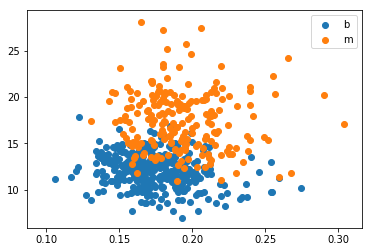

In [30]:
plt.scatter(df_b['symmetry_mean'], df_b['radius_mean'], label='b')
plt.scatter(df_m['symmetry_mean'], df_m['radius_mean'], label='m')
plt.legend()
plt.show()

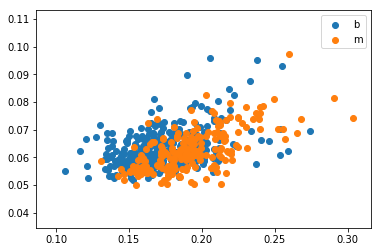

In [31]:
plt.scatter(df_b['symmetry_mean'], df_b['fractal_dimension_mean'], label='b')
plt.scatter(df_m['symmetry_mean'], df_m['fractal_dimension_mean'], label='m')
plt.legend()
plt.show()

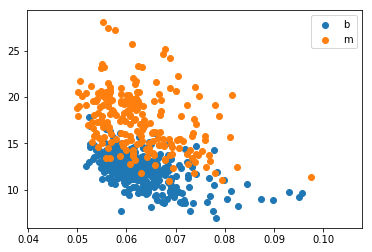

In [32]:
plt.scatter(df_b['fractal_dimension_mean'], df_b['radius_mean'], label='b')
plt.scatter(df_m['fractal_dimension_mean'], df_m['radius_mean'], label='m')
plt.legend()
plt.show()

In [33]:
labels = df['diagnosis']
df.drop(columns = ['diagnosis'], inplace=True)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(df, labels)

## Making sure the dataset is balanced

In [35]:
df_b.shape

(357, 13)

In [36]:
df_m.shape

(212, 13)

In [37]:
y_train.value_counts()  # making sure the train test split

0    257
1    169
Name: diagnosis, dtype: int64

## First Algorithm: Gaussian Naive Bayes

In [38]:
clf_naive_bayes = GaussianNB() 

### Hyperparameters: 
- priors: prior probability of labels if we don't want to use the ones calculated from data'
- var_smoothing: added to variances for calculation stability - default - 1e-9 

In [39]:
clf_naive_bayes.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [40]:
y_pred = clf_naive_bayes.predict(x_test)

In [41]:
accuracy_naive_bayes = accuracy_score(y_test, y_pred)
accuracy_naive_bayes

0.916083916083916

### We will use sklearn.cross_validation to do K-Fold cross validation, as we don't need hyperparams tuning

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
bayes_cross_val_scores = cross_val_score(clf_naive_bayes, df, labels, cv=10, scoring='accuracy')
bayes_cross_val_scores

array([0.9137931 , 0.87931034, 0.87719298, 0.89473684, 0.87719298,
       0.94736842, 0.87719298, 0.94642857, 0.875     , 0.92857143])

In [44]:
bayes_cross_val_scores.mean()

0.9016787658802178

### The accuracy score for Gaussian Naive Bayes is 0.90

## Second Algorithm: Support Vector Machine(SVM)

In [45]:
clf_svm = svm.SVC(C = 1, kernel='rbf', gamma='auto')

### Hyperparameters:
- C: This regularization parameter is used for generalizing the model, and controls the trade off between fitting a small margin hyperplane/ fitting more points, compared to large margin hyperplane/generalizing better.
- kernel: This is part of the kernel trick ( linear, rbf, sigmoid, polynomial)
- gamma: This is intuitively the impact of points closer to decision boundary compared to the ones that are far. 

In [46]:
clf_svm.fit(x_train, y_train) # rbf kernel by default

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
y_pred = clf_svm.predict(x_test)
accuracy_rbf_svm = accuracy_score(y_test, y_pred)

In [48]:
accuracy_rbf_svm

0.9090909090909091

### We are going to use GridSearchCV for hyperparameter tuning and cross validation

In [49]:
param_grid = [
    {'C': [1, 10, 100, 1000, 10000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000, 10000], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly']}
]

In [50]:
grid = GridSearchCV(clf_svm, param_grid, cv = 10, scoring='accuracy', n_jobs = -1)

In [51]:
grid.fit(df, labels)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'C': [1, 10, 100, 1000, 10000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000, 10000], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [52]:
validation_results = pd.DataFrame(data=grid.cv_results_)
validation_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_gamma,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.013700,0.001188,0.0025,0.000671,1,linear,NaN,"{'C': 1, 'kernel': 'linear'}",0.931034,0.862069,...,0.943359,0.941406,0.939453,0.939453,0.947266,0.939571,0.947368,0.947368,0.943761,0.003352
1,0.058798,0.016570,0.0015,0.000500,10,linear,NaN,"{'C': 10, 'kernel': 'linear'}",0.965517,0.931034,...,0.966797,0.957031,0.962891,0.962891,0.968750,0.961014,0.959064,0.962963,0.963095,0.003412
2,0.357495,0.166097,0.0021,0.001044,100,linear,NaN,"{'C': 100, 'kernel': 'linear'}",0.982759,0.948276,...,0.972656,0.972656,0.970703,0.964844,0.972656,0.964912,0.968811,0.970760,0.969342,0.002902
3,3.074858,1.274117,0.0016,0.000490,1000,linear,NaN,"{'C': 1000, 'kernel': 'linear'}",0.982759,0.913793,...,0.972656,0.972656,0.970703,0.972656,0.974609,0.968811,0.972710,0.972710,0.972467,0.001603
4,15.639790,5.093210,0.0015,0.000500,10000,linear,NaN,"{'C': 10000, 'kernel': 'linear'}",0.948276,0.896552,...,0.966797,0.972656,0.968750,0.972656,0.974609,0.966862,0.972710,0.970760,0.970709,0.002616


In [53]:
grid.best_score_, grid.best_params_, grid.best_estimator_

(0.9701230228471002,
 {'C': 100, 'gamma': 0.01, 'kernel': 'poly'},
 SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma=0.01, kernel='poly',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False))

In [54]:
validation_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_kernel', 'param_gamma', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'split5_test_score', 'split6_test_score',
       'split7_test_score', 'split8_test_score', 'split9_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'split5_train_score',
       'split6_train_score', 'split7_train_score', 'split8_train_score',
       'split9_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [55]:
validation_results[['param_kernel', 'param_C', 'mean_test_score', 'param_gamma', 'mean_train_score']].sort_values(by = 'mean_test_score', ascending=False).head(10)

,param_kernel,param_C,mean_test_score,param_gamma,mean_train_score
20,poly,100,0.970123,0.01,0.975008
6,poly,1,0.966608,0.1,0.979108
26,poly,1000,0.966608,0.01,0.979304
32,poly,10000,0.963093,0.01,0.981450
2,linear,100,0.961336,NaN,0.969342
3,linear,1000,0.959578,NaN,0.972467
18,poly,100,0.959578,0.1,0.976176
33,rbf,10000,0.957821,0.001,0.969929
14,poly,10,0.956063,0.01,0.964656
1,linear,10,0.956063,NaN,0.963095


## Third Algorithm: Logistic Regression

In [56]:
clf_logistic = LogisticRegression()

### Hyperparameters:
- C: This regularization parameter is used for generalizing the model, and controls the trade off between fitting a small margin hyperplane/ fitting more points, compared to large margin hyperplane/generalizing better.
- penalty (either l1 or l2): This refers to the norm, and how we want to apply the regularization

In [57]:
clf_logistic.fit(x_train, y_train)
accuracy_score(clf_logistic.predict(x_test), y_test)

0.9300699300699301

### We are going to use GridSearchCV for hyperparameter tuning and cross validation

In [58]:
param_grid = {
    'C': [1,10,100,1000], 'penalty': ['l1', 'l2']
}

In [59]:
grid = GridSearchCV(clf_logistic, param_grid, cv = 10, scoring='accuracy', n_jobs = -1)

In [60]:
grid.fit(df, labels)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [61]:
validation_results = pd.DataFrame(data=grid.cv_results_)
validation_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.049497,0.019570,0.001599,0.000489,1,l1,"{'C': 1, 'penalty': 'l1'}",0.931034,0.879310,0.929825,...,0.945312,0.945312,0.939453,0.945312,0.949219,0.947368,0.941520,0.947368,0.946106,0.003374
1,0.010899,0.006655,0.001801,0.000872,1,l2,"{'C': 1, 'penalty': 'l2'}",0.896552,0.896552,0.877193,...,0.925781,0.933594,0.916016,0.916016,0.925781,0.927875,0.918129,0.931774,0.924819,0.006000
2,0.079399,0.013764,0.001300,0.000458,10,l1,"{'C': 10, 'penalty': 'l1'}",0.982759,0.931034,0.947368,...,0.970703,0.976562,0.966797,0.966797,0.970703,0.962963,0.968811,0.970760,0.970126,0.003788
3,0.007400,0.000800,0.001200,0.000400,10,l2,"{'C': 10, 'penalty': 'l2'}",0.931034,0.896552,0.912281,...,0.951172,0.951172,0.943359,0.943359,0.955078,0.949318,0.939571,0.951267,0.948449,0.004533
4,0.189314,0.063006,0.001000,0.000003,100,l1,"{'C': 100, 'penalty': 'l1'}",0.982759,0.931034,0.947368,...,0.972656,0.972656,0.972656,0.972656,0.978516,0.966862,0.974659,0.972710,0.972662,0.003021


In [62]:
grid.best_score_, grid.best_params_, grid.best_estimator_

(0.9630931458699473,
 {'C': 100, 'penalty': 'l1'},
 LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l1', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False))

In [63]:
validation_results[['param_penalty', 'param_C', 'mean_test_score', 'mean_train_score']].sort_values(by = 'mean_test_score', ascending=False).head(10)

,param_penalty,param_C,mean_test_score,mean_train_score
4,l1,100,0.963093,0.972662
6,l1,1000,0.961336,0.975590
7,l2,1000,0.961336,0.971882
2,l1,10,0.959578,0.970126
5,l2,100,0.957821,0.966612
3,l2,10,0.942004,0.948449
0,l1,1,0.934974,0.946106
1,l2,1,0.919156,0.924819


### Comparison between model  before hyperparameter tunining/ cross validation to after doing that

In [64]:
improv = pd.DataFrame(data = { 'clf': ['naive_bayes', 'svm', 'logistic_regression'], 'before_accuracy': [89.5, 93.7, 91.6], 'after_accuracy': [90, 97, 96.3]})
improv

,clf,before_accuracy,after_accuracy
0,naive_bayes,89.5,90.0
1,svm,93.7,97.0
2,logistic_regression,91.6,96.3


In [65]:
improv['improvement'] = improv['after_accuracy'] - improv['before_accuracy']
improv

,clf,before_accuracy,after_accuracy,improvement
0,naive_bayes,89.5,90.0,0.5
1,svm,93.7,97.0,3.3
2,logistic_regression,91.6,96.3,4.7
